## 650-1 Test Case Resuts

#### Variables: <br> 
Test Size = 0.33  <br> 
 o Size of training set = 21454  <br> 
 o Size of testing set = 10568  <br> 
Number of words used for TFIDF = 650 (reasoning: represents 60% of the area under the graph for Zipf's Law)  <br> 
 <br> 
### RESULT:  <br> 
Accuracy: 0.051005  <br> 
Number of neighbourhoods predicted correctly: 539 (out of 10568)  <br> 
The accuracy is very low, so I wanted to find out why by taking a look at the data that was correctly identified and those that were not. <br>

In [134]:
plt.rcParams['figure.figsize'] = [15, 5]

## Neighbourhoods that were identified correctly <br>
27 neighbourhoods were labelled correctly at least once, however, not all were identified correctly for these neighbourhoods. There should have been 140 different neighbourhoods identified, but only 89 were identified.

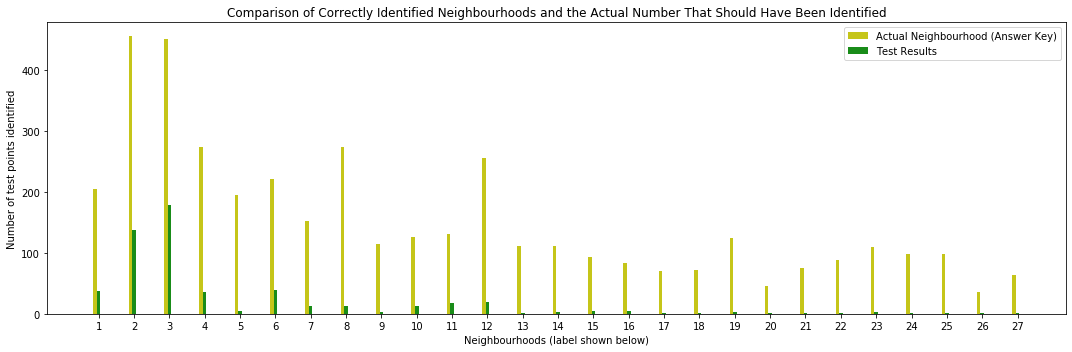

In [166]:
n_groups = 27

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.9

rects1 = plt.bar(index, data_answerkey, bar_width,
alpha=opacity,
color='y',
label='Actual Neighbourhood (Answer Key)')

rects2 = plt.bar(index + bar_width, data_correct, bar_width,
alpha=opacity,
color='g',
label='Test Results')

plt.xlabel('Neighbourhoods (label shown below)')
plt.ylabel('Number of test points identified')
plt.title('Comparison of Correctly Identified Neighbourhoods and the Actual Number That Should Have Been Identified')
plt.xticks(index + bar_width, data_label)
plt.legend()

plt.tight_layout()
plt.show()

In [160]:
neighbourhoods_by_label

{1: 'York University Heights (27)',
 2: 'Bay Street Corridor (76)',
 3: 'Waterfront Communities-The Island (77)',
 4: 'Annex (95)',
 5: 'South Riverdale (70)',
 6: 'Kensington-Chinatown (78)',
 7: 'Yorkdale-Glen Park (31)',
 8: 'Islington-City Centre West (14)',
 9: 'Mount Pleasant West (104)',
 10: 'Trinity-Bellwoods (81)',
 11: 'Milliken (130)',
 12: 'Church-Yonge Corridor (75)',
 13: 'Wexford/Maryvale (119)',
 14: 'West Humber-Clairville (1)',
 15: 'Agincourt South-Malvern West (128)',
 16: 'Dorset Park (126)',
 17: 'Woburn (137)',
 18: 'Mount Pleasant East (99)',
 19: 'Moss Park (73)',
 20: 'Playter Estates-Danforth (67)',
 21: 'Dufferin Grove (83)',
 22: 'Stonegate-Queensway (16)',
 23: 'Niagara (82)',
 24: 'Bendale (127)',
 25: 'Roncesvalles (86)',
 26: 'Clanton Park (33)',
 27: 'High Park-Swansea (87)'}

# Considering the Neighbourhoods that are "Nan" or outside of the neighbourhoods listed

#### Correct amount of "nan" = 2380 <br>
#### Amount of "nan" identified = 1 <br>
These are the businesses that are outside any of the neighbourhood categories. Instead of categorizing the test businesses as 'nan', they were categorized into incorrect existing neighbourhoods.

# Further Steps and Questions After This Test Case

#### 1) It was shown in the small-scale test case that a larger number of words would increase accuracy, so run another test case with a larger number of words. If the accuracy is worse, or the same, then take another look at the code. <br>
#### 2) Are the words I am using even considered useful? What other constraints can I put to make the words more helpful in identifying neighbourhoods? <br>
#### 3) A portion of the test data points were actually supposed to be labelled 'nan'. Determine how I can consider this in my code. <br>
#### 4) Look more into the trends and possibilities of why some neighbourhoods were identified many times (incorrectly), for example, 'Waterfront Communities-The Island (77)': 2630 and 'Bay Street Corridor (76)': 2323. <br>
#### 5) Try testing with a smaller test size and larger training set.

## Code

In [37]:
filename = "YELP-Test-650-1-c.pkl"
dill.load_session(filename)

In [34]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords 
from tqdm import tqdm
from collections import *
import operator
import itertools
import dill
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
import math
from scipy import sparse
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 500)

In [20]:
total_correct = (accuracy_650_1+accuracy_650_2+accuracy_650_3+accuracy_650_4)/4

In [21]:
total_correct

0.051005

In [23]:
total_correct*len(X_test)

539.02084

In [38]:
print(total_nan)
print(total_nan_test)

2380
1


### 1: Answer Key Counter

In [84]:
answerkey_neighbourhoods = []
for key in tqdm(kNearest_650_1.keys()):
    if isinstance(official_neighbourhoods_byName[key],str) == True:
        answerkey_neighbourhoods.append(official_neighbourhoods_byName[key])
for key in tqdm(kNearest_650_2.keys()):
    if isinstance(official_neighbourhoods_byName[key],str) == True:
        answerkey_neighbourhoods.append(official_neighbourhoods_byName[key])
for key in tqdm(kNearest_650_3.keys()):
    if isinstance(official_neighbourhoods_byName[key],str) == True:
        answerkey_neighbourhoods.append(official_neighbourhoods_byName[key])
for key in tqdm(kNearest_650_4.keys()):
    if isinstance(official_neighbourhoods_byName[key],str) == True:
        answerkey_neighbourhoods.append(official_neighbourhoods_byName[key])

counting_answerkey = Counter(answerkey_neighbourhoods)

100%|██████████| 2642/2642 [00:00<00:00, 262032.42it/s]


### 2a: Counter for results from entire test case

In [95]:
test_neighbourhoods = []
for key in tqdm(kNearest_650_1.keys()):
    if isinstance(kNearest_650_1[key],str) == True:
        test_neighbourhoods.append(kNearest_650_1[key])
for key in tqdm(kNearest_650_2.keys()):
    if isinstance(kNearest_650_2[key],str) == True:
        test_neighbourhoods.append(kNearest_650_2[key])
for key in tqdm(kNearest_650_3.keys()):
    if isinstance(kNearest_650_3[key],str) == True:
        test_neighbourhoods.append(kNearest_650_3[key])
for key in tqdm(kNearest_650_4.keys()):
    if isinstance(kNearest_650_4[key],str) == True:
        test_neighbourhoods.append(kNearest_650_4[key])
    
counting_test = Counter(test_neighbourhoods)

100%|██████████| 2642/2642 [00:00<00:00, 528312.33it/s]


### 2b: Counter for neighbourhoods we got correct

In [87]:
correct_neighbourhoods = []
for key in tqdm(kNearest_650_1.keys()):
    if kNearest_650_1[key] == official_neighbourhoods_byName[key]:
        correct_neighbourhoods.append(official_neighbourhoods_byName[key])
for key in tqdm(kNearest_650_2.keys()):
    if kNearest_650_2[key] == official_neighbourhoods_byName[key]:
        correct_neighbourhoods.append(official_neighbourhoods_byName[key])
for key in tqdm(kNearest_650_3.keys()):
    if kNearest_650_3[key] == official_neighbourhoods_byName[key]:
        correct_neighbourhoods.append(official_neighbourhoods_byName[key])
for key in tqdm(kNearest_650_4.keys()):
    if kNearest_650_4[key] == official_neighbourhoods_byName[key]:
        correct_neighbourhoods.append(official_neighbourhoods_byName[key])
        
counting_correct = Counter(correct_neighbourhoods)

100%|██████████| 2642/2642 [00:00<00:00, 220121.39it/s]


In [96]:
all_neighbourhoods_returned = set()
for key in counting_test.keys():
    all_neighbourhoods_returned.add(key)
for key2 in counting_answerkey.keys():
    all_neighbourhoods_returned.add(key2)

In [157]:
# Write data for Set 1 and 2b
label = 1
data_label = []
data_answerkey = []
data_correct = []
data_neighbourhoods = []
neighbourhoods_by_label = dict()
for key in tqdm(counting_correct.keys()):
    data_neighbourhoods.append(key)
    data_label.append(label)
    if key in counting_answerkey.keys():
        data_answerkey.append(counting_answerkey[key])
    if key not in counting_answerkey.keys():
        data_answerkey.append(0)
    data_correct.append(counting_correct[key])
    label +=1

for number in data_label:
    neighbourhoods_by_label[number] = data_neighbourhoods[number-1]

100%|██████████| 27/27 [00:00<00:00, 26963.38it/s]
